In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


In [7]:
device = 'cuda'

In [59]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x

    
        
        
        

In [60]:
net = Net()
net.to(device)
torch.set_default_device(device)
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [17]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight
print(params[1].size())  # conv1's .weight
print(params[2].size())  # conv1's .weight
print(params[3].size())  # conv1's .weight
print(params[4].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])


In [11]:
input = Variable(torch.randn(1,1, 32,32))

In [12]:
output = net(input)

In [19]:
output, F.softmax(output)

/home/ubuntu/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/utils/_device.py:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return func(*args, **kwargs)


(tensor([[0.0000, 0.0825, 0.0000, 0.0094, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000]], device='cuda:0', grad_fn=<ReluBackward0>),
 tensor([[0.0991, 0.1076, 0.0991, 0.1000, 0.0991, 0.0991, 0.0991, 0.0991, 0.0991,
          0.0991]], device='cuda:0', grad_fn=<SoftmaxBackward0>))

In [23]:
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

In [24]:
batch_size = 64

In [26]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='data', 
    train=True, 
    download=True, 
    transform=transforms.ToTensor())


test_dataset = torchvision.datasets.FashionMNIST(
    root='data',
    train=True, 
    download=True,
    transform=transforms.ToTensor())

In [38]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,generator=torch.Generator(device=device))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, generator=torch.Generator(device=device))

In [39]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}
classes = [value for key, value in labels_map.items()]

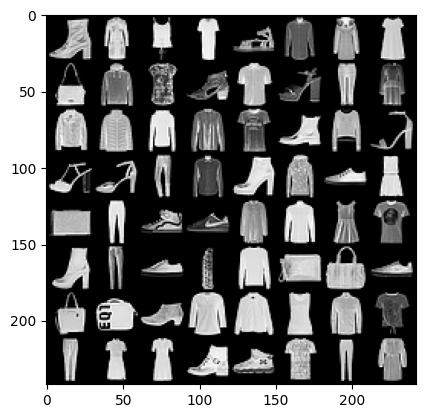

Ankle Boot Dress T-Shirt Dress Sandal Shirt Coat  Dress Bag   Pullover Shirt Sandal Shirt Sandal Trouser Dress Coat  Coat  Pullover Shirt T-Shirt Ankle Boot Pullover Sandal Sandal Sandal Trouser Shirt Ankle Boot Pullover Sneaker Dress Bag   Trouser Sneaker Sneaker Shirt Shirt Dress T-Shirt Ankle Boot Trouser Sneaker Dress Pullover Bag   Bag   Sneaker Bag   Bag   Ankle Boot T-Shirt Coat  T-Shirt Shirt T-Shirt Trouser Dress Dress Ankle Boot Sneaker T-Shirt Trouser Dress


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [47]:
import torch.optim as optim

In [73]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3)

In [ ]:
epoch = 100
for epoch in range(epoch):
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {loss.item() / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.004
[1,   200] loss: 0.006
[1,   300] loss: 0.005
[1,   400] loss: 0.003
[1,   500] loss: 0.007
[1,   600] loss: 0.006
[1,   700] loss: 0.005
[1,   800] loss: 0.005
[1,   900] loss: 0.007
[2,   100] loss: 0.007
[2,   200] loss: 0.006
[2,   300] loss: 0.005
[2,   400] loss: 0.005
[2,   500] loss: 0.003
[2,   600] loss: 0.006
[2,   700] loss: 0.007
[2,   800] loss: 0.005
[2,   900] loss: 0.006
[3,   100] loss: 0.006
[3,   200] loss: 0.007
[3,   300] loss: 0.006
[3,   400] loss: 0.004
[3,   500] loss: 0.005
[3,   600] loss: 0.008
[3,   700] loss: 0.004
[3,   800] loss: 0.008
[3,   900] loss: 0.008
[4,   100] loss: 0.007
[4,   200] loss: 0.006
[4,   300] loss: 0.006
[4,   400] loss: 0.005
[4,   500] loss: 0.007
[4,   600] loss: 0.006
[4,   700] loss: 0.008
[4,   800] loss: 0.005
[4,   900] loss: 0.005
[5,   100] loss: 0.005
[5,   200] loss: 0.003
[5,   300] loss: 0.005
[5,   400] loss: 0.005
[5,   500] loss: 0.007
[5,   600] loss: 0.006
[5,   700] loss: 0.006
[5,   800] 

In [87]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 87 %


In [79]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 1.076
[1,   200] loss: 1.081
[1,   300] loss: 1.060
[1,   400] loss: 1.062
[1,   500] loss: 1.070
[1,   600] loss: 1.085
[1,   700] loss: 1.082
[1,   800] loss: 1.047
[1,   900] loss: 1.067
[2,   100] loss: 1.070
[2,   200] loss: 1.077
[2,   300] loss: 1.083
[2,   400] loss: 1.047
[2,   500] loss: 1.046
[2,   600] loss: 1.074
[2,   700] loss: 1.048
[2,   800] loss: 1.020
[2,   900] loss: 1.061
Finished Training
